In [53]:
# Import Libraries
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt


In [54]:
#reading csv files
df_edges = pd.read_csv('edges_L6.csv')
df_nodes = pd.read_csv('nodes_l6.csv')



In [55]:
#initialize graph
G = nx.Graph()


In [56]:
#find edges
def ObtainEdges(df):
    edges_list = [];
    for index, info in df.iterrows():
        edges_list.append((info[0], info[1]))
    return edges_list


In [57]:
edges_list = ObtainEdges(df_edges)


In [58]:
# find nodes
def ObtainAttr(df):
    attr_dict = dict()
    for index, info in df.iterrows():
        attr_dict[info[0]] = info[1];
    return attr_dict



In [59]:
attr_dict= ObtainAttr(df_nodes)

In [60]:
# Task 1
#Number of Nodes in each node set
no_nodes = len(attr_dict)

print(attr_dict.values())
#Number of Edges in  each node set
no_edges = len(edges_list)




dict_values([53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 398, 139, 28, 47, 471, 495, 272, 273, 433, 189, 599, 447, 437, 592, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 448, 399, 427, 27, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 430, 489, 672, 673, 487, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 512, 513, 514, 496, 497, 411, 582, 190, 191, 449, 116, 117, 118, 119, 498, 387, 667, 668, 669, 670, 671, 144, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 488, 420, 

In [9]:
df_nodes_list1 = df_nodes['pol_ge_sp'].tolist()
df_nodes_list2 = df_nodes['plant_ge'].tolist()


G.add_nodes_from(df_nodes_list1, bipartite=0)
G.add_nodes_from(df_nodes_list2, bipartite=1)
G.add_edges_from(edges_list)




In [10]:
# Using Maximum Cardinal Matching to calculate the desired result
# Task 2
# Plants pollinated by the most insects
my_matching1 = bipartite.matching.hopcroft_karp_matching(G,df_nodes_list1)


#Insects that pollinate the most plants
my_matching2 = bipartite.matching.hopcroft_karp_matching(G,df_nodes_list2)


In [11]:
#Task 3
# Strongest Competitor

strong_matching = bipartite.maximum_matching(G,df_nodes_list1)

In [12]:
#Task 4
# 4.a Projected Networks
# splitting lists

def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

net1,net2 = split_list([*attr_dict])


#one projected network
B1 = nx.path_graph(no_nodes)
X1 = bipartite.projected_graph(B1, net1)
c1 = list(X1)
e1 = list(X1.edges())


# 4.b 

#no of nodes
cnt1 = len(c1)

#no of edges
ent1 = len(e1)


#average degree
avg_degree1 = nx.k_nearest_neighbors(X1)



#next projected network
B2= nx.path_graph(no_nodes)
X2 = bipartite.projected_graph(B2, net2)
c2 = list(X2)
e2 = list(X2.edges())
# 4.b 

#no of nodes
cnt2 = len(c2)


#no of edges
ent2 = len(e2)


#average degree
avg_degree2 = nx.k_nearest_neighbors(X2)



In [13]:
# Task 5

#5.a

degree_cent1 = nx.degree_centrality(X1)


degree_cent2 = nx.degree_centrality(X2)


#calculate largest degree centrality in both networks
large_degree_cent1 = max(k for k, v in degree_cent1.items() if v != 0)


large_degree_cent2 = max(k for k, v in degree_cent2.items() if v != 0)




In [14]:
# Task 6
#find the isolated nodes

is_node1 = list(nx.isolates(X1))


is_node2 = list(nx.isolates(X2))




In [15]:
# Task 7
# Clustering into subgroups

#These are just clustering coefficients. We will need to use scikit-learn to actually regroup them.

clustr1 = nx.clustering(X1)

clustr2 = nx.clustering(X2)

In [16]:
from sklearn.cluster import KMeans


Defaulting to user installation because normal site-packages is not writeable


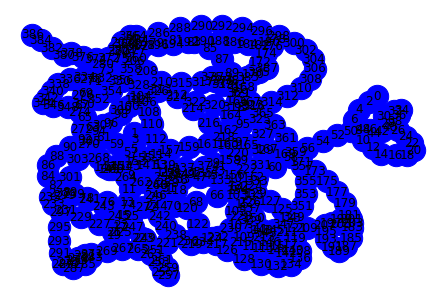

In [17]:
nx.draw(X1,with_labels = True,node_color='b',node_size=500);
!pip install node2vec

In [33]:
from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(X1, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("embedding.emb") #save the embedding in file embedding.emb

In [18]:
from sklearn.cluster import KMeans
import numpy as np


X = np.loadtxt("embedding.emb", skiprows=1) 

X=X[X[:,0].argsort()]; 
Z=X[0:X.shape[0],1:X.shape[1]]

kmeans = KMeans(n_clusters=2, random_state=0).fit(Z)
labels=kmeans.labels_ 
print(labels)
print(len((labels)))

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
388


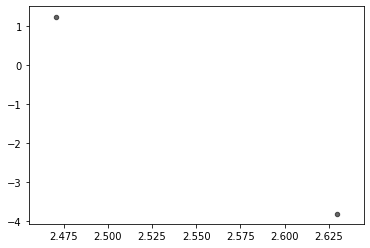

In [19]:
centers = kmeans.cluster_centers_
# Plot centers
## YO CHAI NA MILY HUNA SAKXA PLOT GAREYKO 
# EXACLTY K PLOT GAREYRA DEKHAUNA HO

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha = 0.6);

In [20]:
from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(X2, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("embedding.emb") #save the embedding in file embedding.emb

In [21]:
from sklearn.cluster import KMeans
import numpy as np


X = np.loadtxt("embedding.emb", skiprows=1) 

X=X[X[:,0].argsort()]; 
Z=X[0:X.shape[0],1:X.shape[1]]

kmeans = KMeans(n_clusters=2, random_state=0).fit(Z)
labels=kmeans.labels_ 
print(labels)
print(len((labels)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
388


In [111]:
# Task 8

#Calculating degree assortativity coefficient

r1 = nx.degree_assortativity_coefficient(X1)

r2 = nx.degree_assortativity_coefficient(X2)



In [112]:
# Task 9


In [113]:
df_nodes

,# index,idx,pollinator,pol_ge_sp,plant_ge,plant_sp,_pos
0,0,53,1,ACHILIDAE1 (Ach. : Hem. ),NaN,NaN,"array([-0.56541095, -2.76309565])"
1,1,1,0,NaN,Acer,rufinerve,"array([-0.1164353 , -2.07462624])"
2,2,2,0,NaN,Adenocaulon,himalaicum,"array([-0.12344886, -2.43315122])"
3,3,3,0,NaN,Aesculus,turbinata,"array([-0.14942567, -2.65879824])"
4,4,4,0,NaN,Agrimonia,pilosa,"array([-0.1462946 , -2.48239974])"
...,...,...,...,...,...,...,...
767,767,675,1,LUSIIDAE1 (Clu. : Dip. ),NaN,NaN,"array([-0.4119717 , -2.51722849])"
768,768,676,1,Lasioglossum (El.) aff (Hal. : Hym ),NaN,NaN,"array([-0.40843003, -2.83585683])"
769,769,677,1,Camponotus sp. (For. : Hym. ),NaN,NaN,"array([-0.36137743, -1.97689426])"
770,770,678,1,Andrena sp. (And. : Hym. ),NaN,NaN,"array([-0.23316587, -2.03744439])"


In [114]:
print(len(df_nodes['pollinator']))
print(len(G))

772
1522


In [115]:
color_map = []
i = 0 
for node in range(len(df_nodes)):
    if df_nodes['pollinator'][i] == 0:
         color_map.append('blue')        
    else: 
        color_map.append('red')  
    i += 1   

In [116]:
len(color_map)

772

In [117]:
for i in range(len(G)- len(color_map)):
    color_map.append('green')
    

In [118]:
len(color_map)

1522

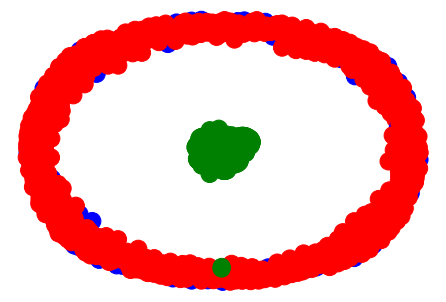

In [119]:
nx.draw(G, node_color=color_map)

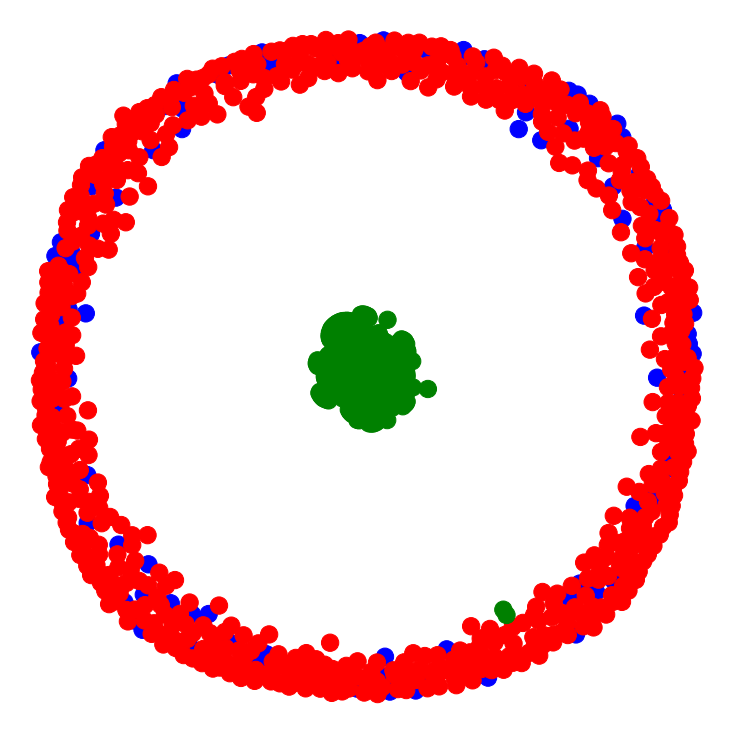

In [120]:
plt.figure(3,figsize=(10,10)) 
nx.draw(G, node_color=color_map)
plt.show()

# 9 ko 2

In [121]:
degree_cent1_sort = dict(sorted(degree_cent1.items(), key=lambda item: item[0]))

sizes = []

temp = (degree_cent1.values()) 
min_deg_centrality = min(list(temp))
min_deg_centrality

sizes_c1 = []
i = 0 

for node in range(len(degree_cent1_sort)):
    sizes.append(min_deg_centrality*0.2*degree_cent1_sort[i])
    
    
plt.figure(3,figsize=(12,12)) 



<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [122]:
degree_cent2_sort = dict(sorted(degree_cent2.items(), key=lambda item: item[0]))

sizes = []

temp = (degree_cent1.values()) 
min_deg_centrality = min(list(temp))
min_deg_centrality

sizes_c1 = []
i = 0 

for node in range(len(degree_cent1_sort)):
    sizes.append(min_deg_centrality*0.2*degree_cent1_sort[i])
    
    
plt.figure(3,figsize=(12,12)) 



<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>